<h1>Aggregate all 30 stocks in the DJIA</h1>

In [800]:
DJIA_STOCKS = ['MSFT', 'AAPL', 'AMZN', 'JPM', 'WMT', 'V', 'UNH', 'PG', 'JNJ', 'HD', 'MRK', 'CVX', 'KO', 'CRM', 'CSCO', 'MCD', 'DIS', 'VZ', 'AXP', 'AMGN', 'CAT', 'IBM', 'GS', 'HON', 'INTC', 'NIKE', 'BA', 'MMM', 'TRV', 'DOW']
len(DJIA_STOCKS) == 30
# No pruning of data needed.

True

<h2>Yahoo Finance does not require an api key!</h2>
<b>Run this cell once, then all of the data will be saved in a pickle (and csv files)!</b>

In [801]:
import yfinance as yf
import pickle
import os

stock_market_cap = {}
stock_data = {}

if 'DJIA Historical Data' not in os.listdir():
    os.mkdir('DJIA Historical Data')

    for stock in DJIA_STOCKS:
        ticker_data = yf.Ticker(stock)
        hist = ticker_data.history(period='max')
    
        hist.to_csv(f'DJIA Historical Data/{stock}.csv')
        stock_data[stock] = hist
        if 'marketCap' in ticker_data.info:
            stock_market_cap[stock] = ticker_data.info['marketCap']
        else:
            print(f'{stock} DOES NOT HAVE MARKET CAP DATA.')
else:
    print("DJIA Historical Data already pulled.")


if 'stock_ohlcv.pkl' not in os.listdir():
    pickle.dump(stock_data, open('stock_ohlcv.pkl', 'wb'))
else:
    print("DJIA's OHLCV Data already pickled.")


if 'stock_market_cap.pkl' not in os.listdir():
    pickle.dump(stock_market_cap, open('stock_market_cap.pkl', 'wb'))
else:
    print("DJIA's Market Cap Data already pickled.")

print("DONE!")

DJIA Historical Data already pulled.
DJIA's OHLCV Data already pickled.
DJIA's Market Cap Data already pickled.
DONE!


<h1>Once you download all of the DJIA data, always load the data here!</h1>

In [802]:
djia_data = pickle.load(open('stock_ohlcv.pkl', 'rb'))
djia_market_cap = pickle.load(open('stock_market_cap.pkl', 'rb'))

<h1>Remove all stocks with no entries.</h1>

In [803]:
for stock in DJIA_STOCKS:
    if len(djia_data[stock]) <= 0:
        DJIA_STOCKS.remove(stock)
print(f'STOCKS IN DJIA CURRENTLY: {len(DJIA_STOCKS)}')

STOCKS IN DJIA CURRENTLY: 29


<H1>Calculate 1M, 6M, 2Y, and ALL-TIME volatility, average price, increasing days, and decreasing days.</H1>

In [804]:
import numpy as np
import datetime as dt
from pandas import DatetimeIndex
today = np.datetime64('2024-07-06', 'ns')

In [805]:
import pandas as pd
import math
pd.set_option('display.width', 200) 

temp_djia_data = {}
summary_statistics = pd.DataFrame(index=DJIA_STOCKS)

#temp = []
for stock in DJIA_STOCKS:
    df = djia_data[stock]
    df.index = df.index.tz_localize(None)
    df = df.reset_index()
    temp_djia_data[stock] = df
    #temp_df = df[df['Date'] > today - np.timedelta64(7, 'D')]
    #temp_df = temp_df.reset_index()
    #print(temp_df)
    #df[date] = df[df['Date'] > today]
    #print(df)
temp_stats = {}
for stock in DJIA_STOCKS: #1M Volatility
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31, 'D')]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['1M Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # 1M Average Price
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31, 'D')]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['1M Avg. Close'] = temp_stats
temp_stats = {}



temp_stats1 = {}
for stock in DJIA_STOCKS: #1M Increasing & Decreasing Days
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31, 'D')]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['1M Inc. Days'] = temp_stats
summary_statistics['1M Dec. Days'] = temp_stats1

temp_stats = {}
for stock in DJIA_STOCKS: #6M Volatility
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31*6, 'D')]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['6M Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # 6M Average Price
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31*6, 'D')]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['6M Avg. Close'] = temp_stats
temp_stats = {}

temp_stats1 = {}
for stock in DJIA_STOCKS: #6M Increasing & Decreasing Days
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31*6, 'D')]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
        last_price = close
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['6M Inc. Days'] = temp_stats
summary_statistics['6M Dec. Days'] = temp_stats1



temp_stats = {}
for stock in DJIA_STOCKS: #2Y Volatility
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(365*2, 'D')]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['2Y Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # 2Y Average Price
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(365*2, 'D')]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['2Y Avg. Close'] = temp_stats
temp_stats = {}

temp_stats1 = {}
for stock in DJIA_STOCKS: #6M Increasing & Decreasing Days
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(365*2, 'D')]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
        last_price = close
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['2Y Inc. Days'] = temp_stats
summary_statistics['2Y Dec. Days'] = temp_stats1




temp_stats = {}
for stock in DJIA_STOCKS: #ALL-TIME Volatility
    df = temp_djia_data[stock]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['ALL-TIME Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # ALL-TIME Average Price
    df = temp_djia_data[stock]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['ALL-TIME Avg. Close'] = temp_stats
temp_stats = {}

temp_stats1 = {}
for stock in DJIA_STOCKS: #ALL-TIME Increasing & Decreasing Days
    df = temp_djia_data[stock]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
        last_price = close
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['ALL-TIME Inc. Days'] = temp_stats
summary_statistics['ALL-TIME Dec. Days'] = temp_stats1

print(summary_statistics)

       1M Vol.  1M Avg. Close  1M Inc. Days  1M Dec. Days   6M Vol.  6M Avg. Close  6M Inc. Days  6M Dec. Days   2Y Vol.  2Y Avg. Close  2Y Inc. Days  2Y Dec. Days  ALL-TIME Vol.  \
MSFT  2.626514     445.962001            18             1  1.708001     414.842490            70            56  3.036538     322.254734           261           239       0.903777   
AAPL  1.900753     210.983000            18             1  1.261706     185.132007            67            59  0.894156     169.493257           263           237       0.428827   
AMZN  1.346333     189.571500            14             5  1.066291     176.382598            69            57  1.372040     133.238743           261           239       0.644531   
JPM   1.094499     197.975735            13             6  1.010656     187.254909            72            54  1.257126     145.901219           280           220       0.387759   
WMT   0.207225      67.586000            13             6  0.406365      60.246428        

<h1>Calculating returns then store in a pickle</h1>
<b>This will take a while if running first time (and is not pickled)...</b>

In [806]:
if 'djia_returns.pkl' not in os.listdir():
    djia_returns = {}
    print("START")
    for i,stock in enumerate(DJIA_STOCKS):
        print(f'{(i+1)/len(DJIA_STOCKS) * 100}%-\t{stock}')
        temp_data = []
        df = djia_data[stock]
    
        last_close = None
        skippedFirst = False
        for row in df.iloc:
            close = row['Close']
            if not skippedFirst:
                skippedFirst = True
                last_close = close
                temp_data.append(0)
                continue
            temp_data.append(close / last_close - 1)
            last_close = close
        djia_returns[stock] = pd.DataFrame({'Date': df.index, 'Return': temp_data})
    
    #df_returns = pd.DataFrame(djia_returns)
    
    pickle.dump(djia_returns, open('djia_returns.pkl', 'wb'))
else:
    print(f'"djia_returns.pkl" ALREADY EXISTS.')

print('DONE')
    

"djia_returns.pkl" ALREADY EXISTS.
DONE


<h1>Unpickle djia_returns.pkl</h1>

In [807]:
djia_returns = pickle.load(open('djia_returns.pkl', 'rb'))

<h1>RUN THIS TO PLOT ALL RETURNS!</h1>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


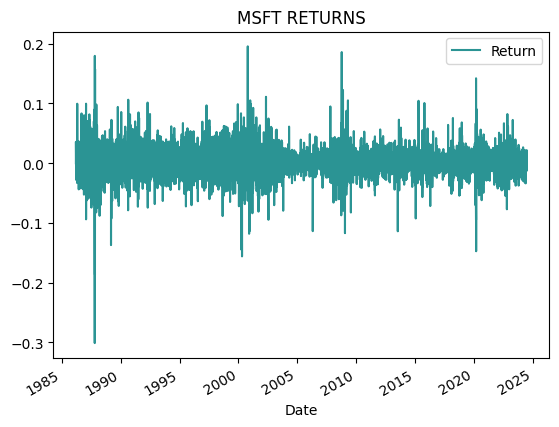

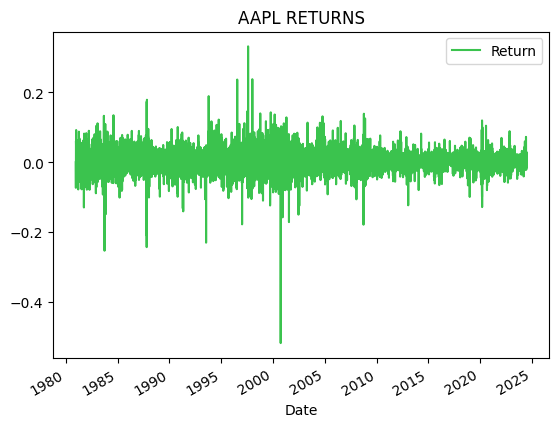

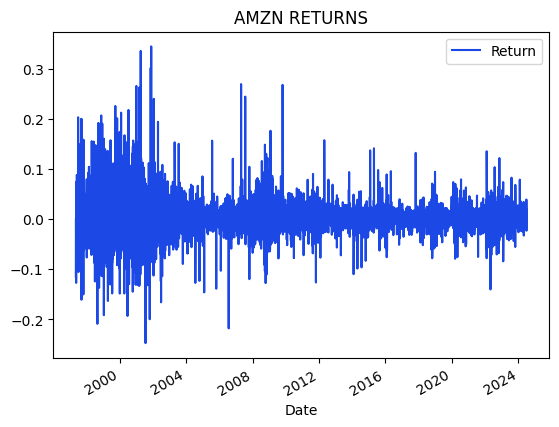

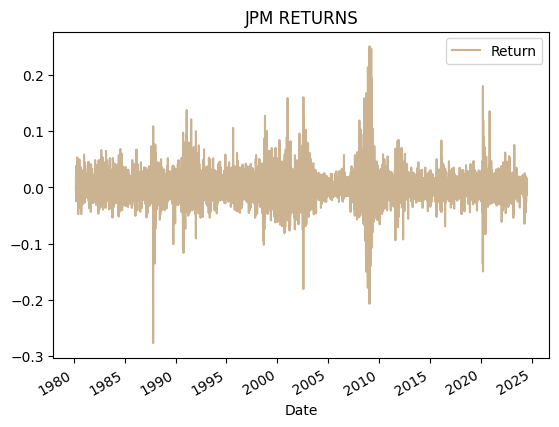

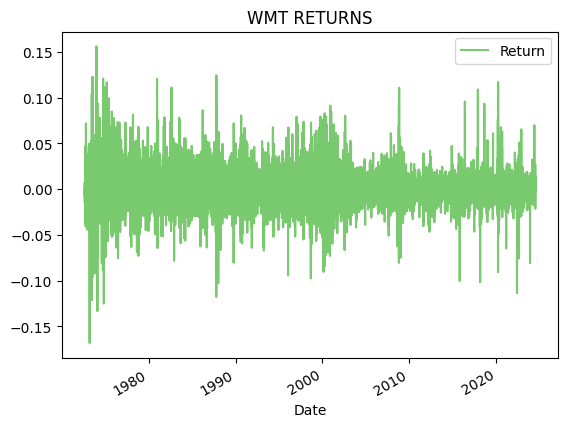

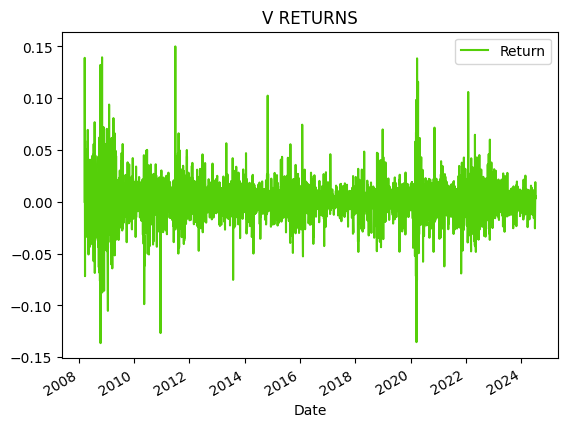

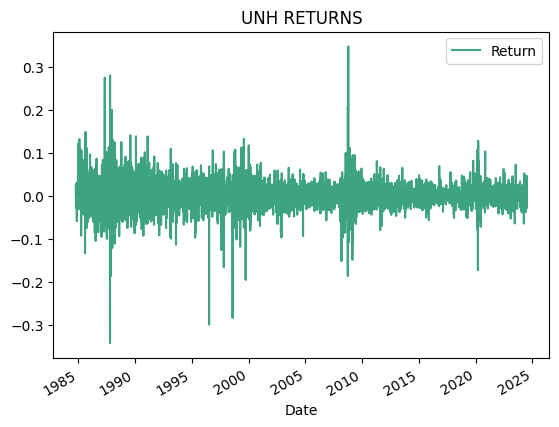

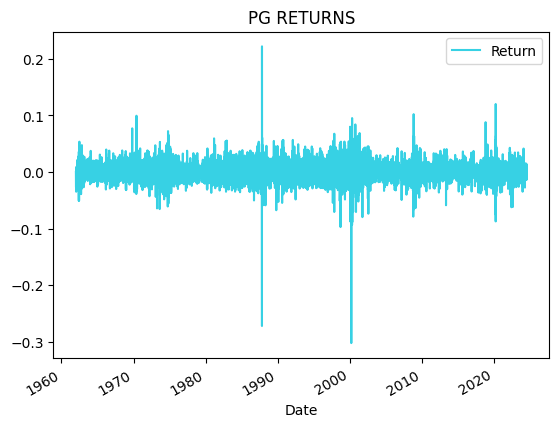

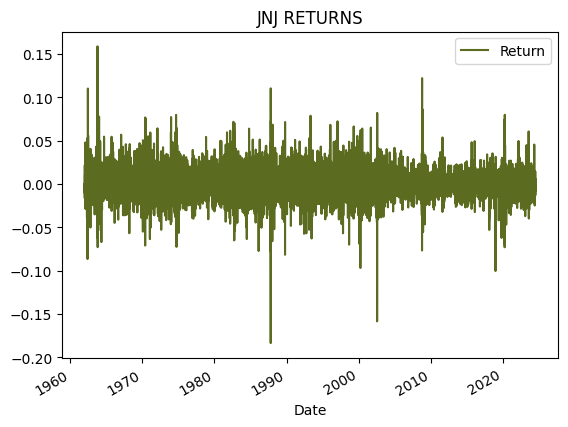

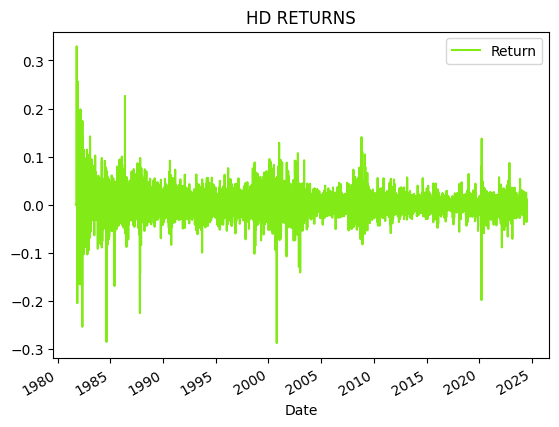

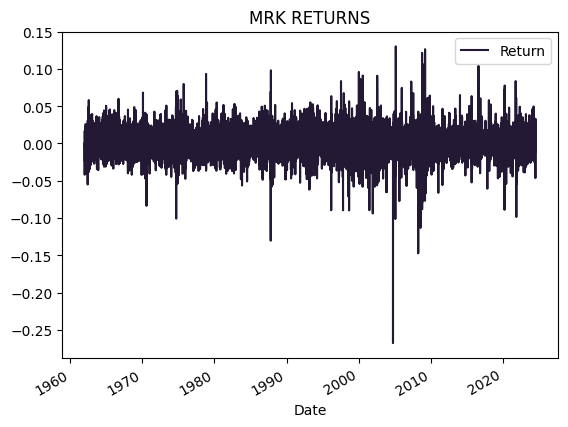

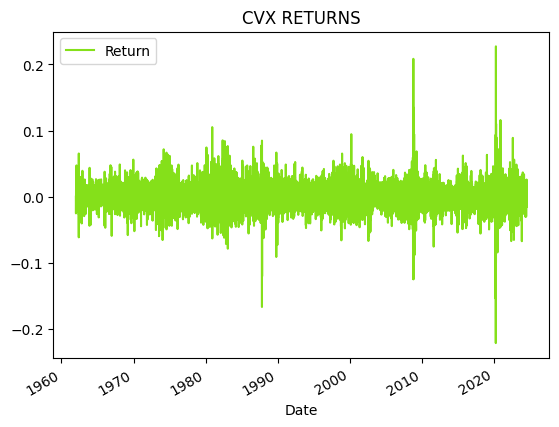

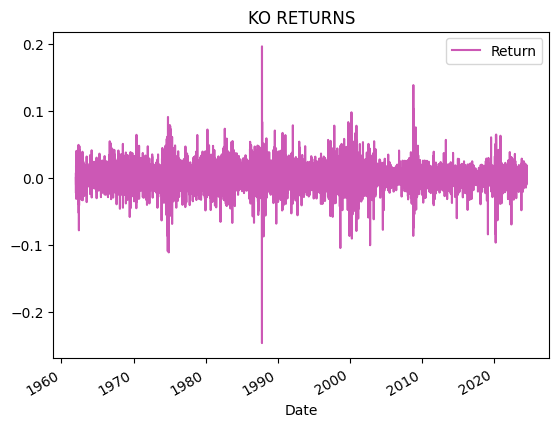

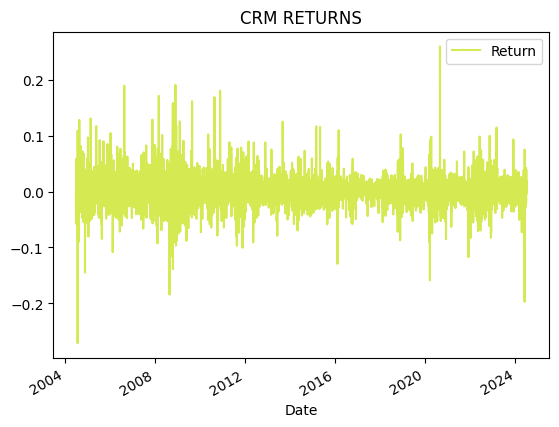

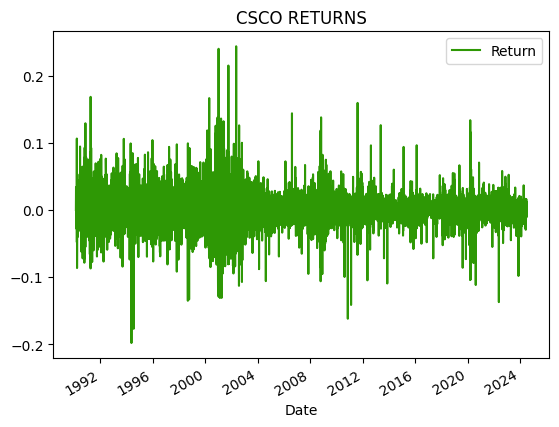

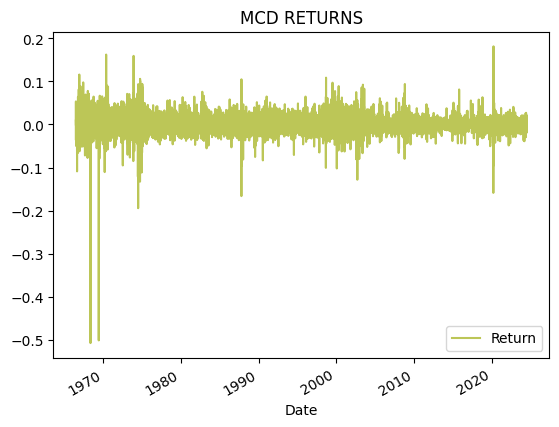

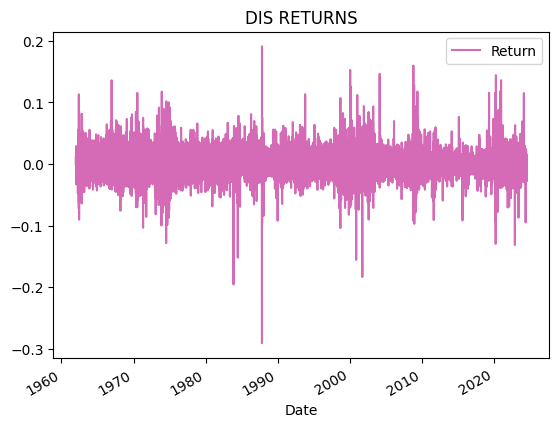

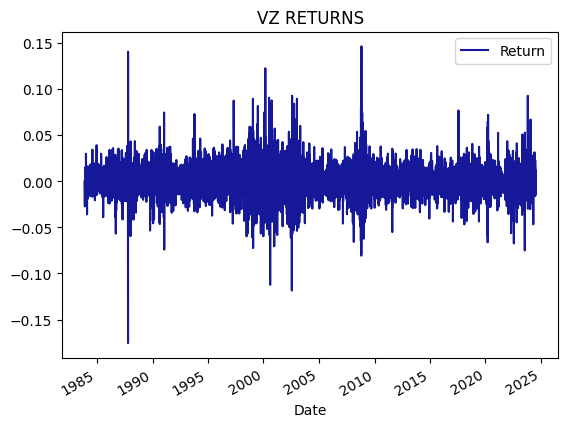

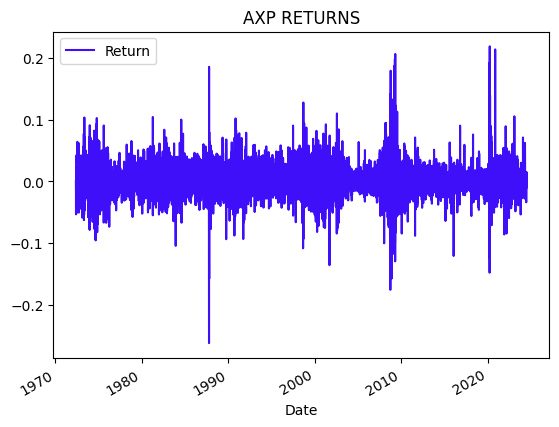

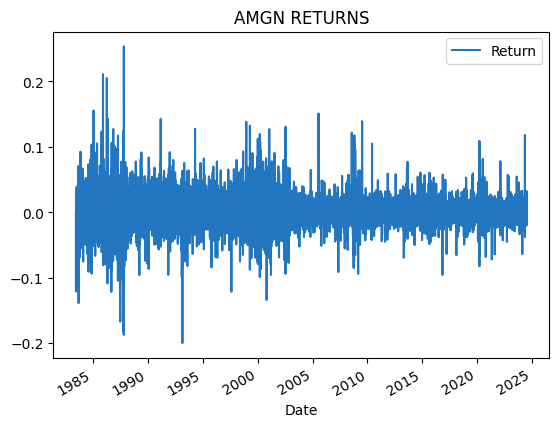

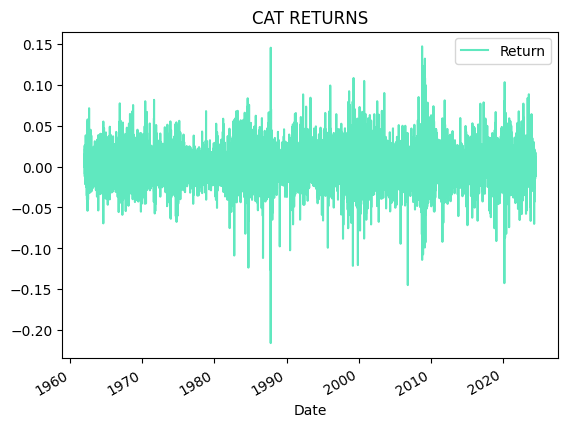

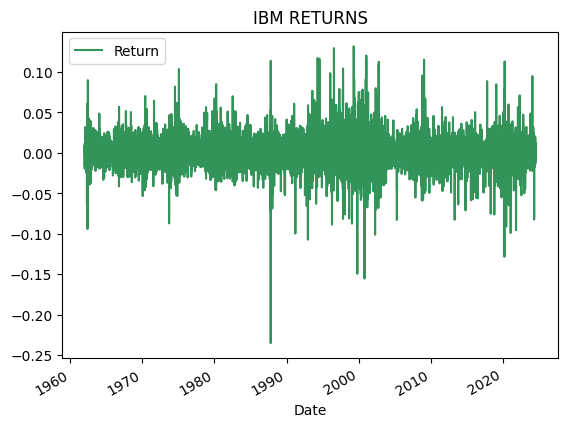

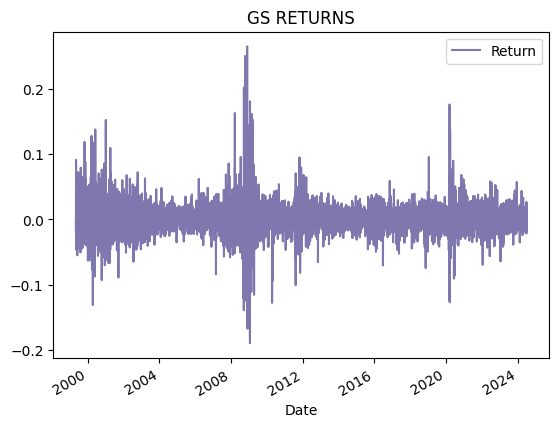

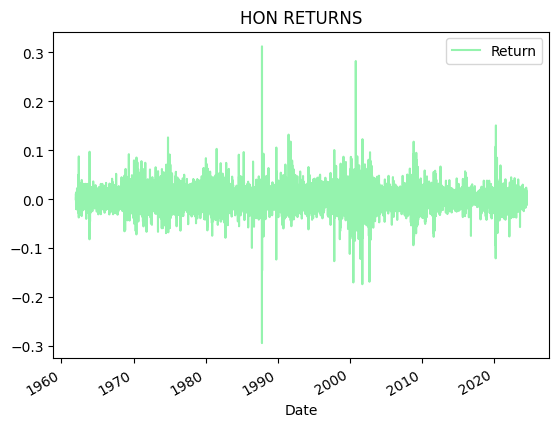

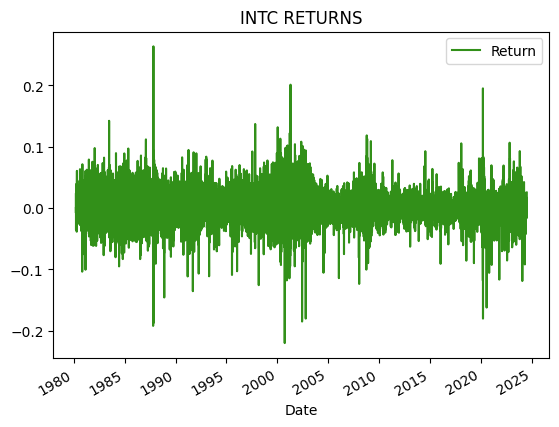

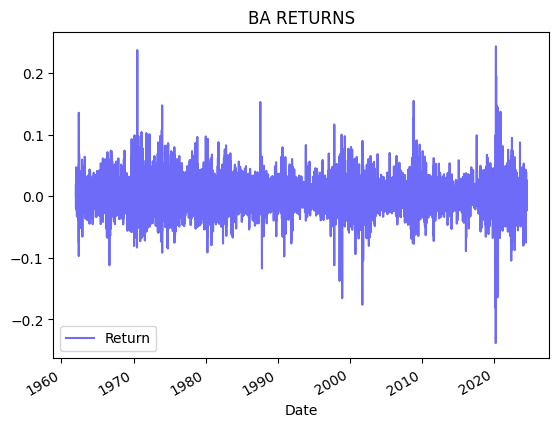

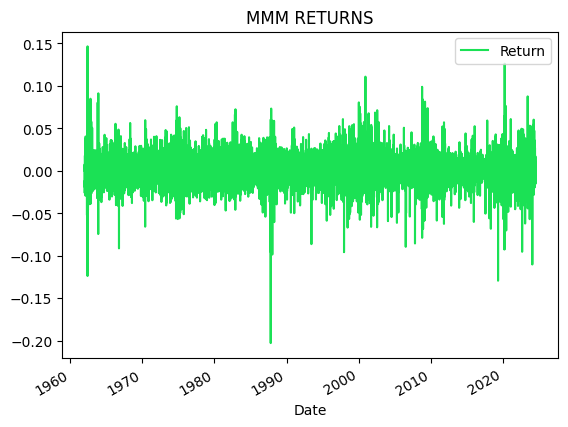

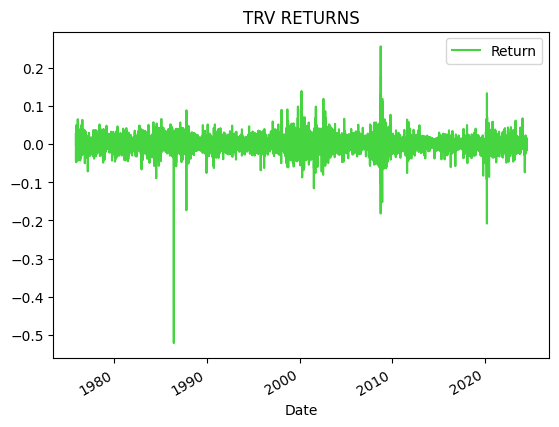

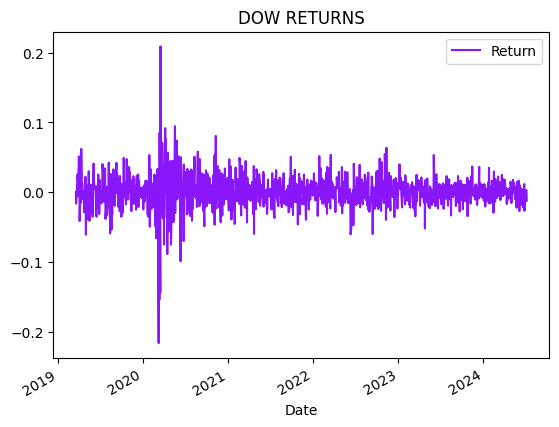

In [808]:
#djia_returns['AAPL'].plot(x='Date', y='Return')
import random
for stock in djia_returns:
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    djia_returns[stock].plot(x='Date', y='Return', title=f'{stock} RETURNS', color=color)

<h1>Creating CORR matrix (from returns)</h1>

In [809]:
import matplotlib.pyplot as plt
# We want 7,300 days worth of data (20 yrs)
return_eligible_stocks = {}

for stock in djia_returns:
    if len(djia_returns[stock]) > 365*20: # this is not precise because there are not 365 trading days/year but it will get the job done, and it is an underestimate so it won't cause out-of-bounds exceptions
        return_eligible_stocks[stock] = None
print(return_eligible_stocks)
print(f'Eligible stocks: {len(return_eligible_stocks)}')

first_date = today - np.timedelta64(365*20, 'D')

df_list = []

for stock in return_eligible_stocks:
    df = djia_returns[stock]
    df = df[df['Date'] > first_date]
    df = df.set_index('Date')
    df = df.rename(columns={"Return": f"{stock} Returns"})
    df_list.append(df)

return_matrix = pd.concat(df_list, axis=1).sort_index()
#return_marix = return_matrix[return_matrix['Date'] > first_date]
#print(return_matrix)


{'MSFT': None, 'AAPL': None, 'JPM': None, 'WMT': None, 'UNH': None, 'PG': None, 'JNJ': None, 'HD': None, 'MRK': None, 'CVX': None, 'KO': None, 'CSCO': None, 'MCD': None, 'DIS': None, 'VZ': None, 'AXP': None, 'AMGN': None, 'CAT': None, 'IBM': None, 'HON': None, 'INTC': None, 'BA': None, 'MMM': None, 'TRV': None}
Eligible stocks: 24


<h1>3 Month Correlation Matrix</h1>

In [810]:
curr_matrix = return_matrix.reset_index()
curr_matrix = curr_matrix[curr_matrix['Date'] > today - np.timedelta64(90, 'D')]
curr_matrix.set_index('Date')

corr = curr_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')

,Date,MSFT Returns,AAPL Returns,JPM Returns,WMT Returns,UNH Returns,PG Returns,JNJ Returns,HD Returns,MRK Returns,CVX Returns,KO Returns,CSCO Returns,MCD Returns,DIS Returns,VZ Returns,AXP Returns,AMGN Returns,CAT Returns,IBM Returns,HON Returns,INTC Returns,BA Returns,MMM Returns,TRV Returns
Date,1.000000,0.232031,0.115960,0.104792,0.087456,-0.145904,-0.177217,0.044487,0.082785,-0.036517,-0.044550,-0.045729,0.049892,-0.089614,0.050538,0.131554,-0.058868,-0.065467,0.089354,0.216879,0.058207,0.265385,0.096481,-0.093846,0.043400
MSFT Returns,0.232031,1.000000,0.424209,-0.009075,-0.001996,-0.191604,-0.161133,0.043947,0.173053,0.094209,-0.022540,-0.026605,0.136101,-0.029764,0.252845,-0.087477,0.015852,0.198912,0.383673,0.390961,0.078300,0.191931,0.114010,-0.157790,-0.109900
AAPL Returns,0.115960,0.424209,1.000000,-0.146989,0.004923,-0.276556,-0.075592,-0.060758,0.185769,0.030071,-0.080175,0.060515,0.055411,-0.055000,0.017531,-0.053573,-0.167776,0.375932,0.093609,0.018838,0.090318,0.252296,0.153675,-0.056193,-0.129919
JPM Returns,0.104792,-0.009075,-0.146989,1.000000,0.067163,0.136651,0.131607,0.293292,0.157077,0.029377,0.505193,0.336030,0.314800,0.125258,0.221676,0.183955,0.482308,0.141352,0.167582,0.278106,0.256639,0.179532,0.193086,0.236282,0.321074
WMT Returns,0.087456,-0.001996,0.004923,0.067163,1.000000,0.188418,0.408575,0.142268,0.038030,0.108837,0.172295,0.265938,-0.220108,0.141609,0.038937,-0.068545,0.092409,-0.013485,-0.084453,0.122793,0.226093,0.196143,0.313265,0.033576,0.274498
UNH Returns,-0.145904,-0.191604,-0.276556,0.136651,0.188418,1.000000,0.283345,0.110529,0.209419,-0.094872,0.213661,0.321209,0.204080,0.273331,-0.029624,0.189066,0.136693,0.040623,0.031798,0.123946,0.089612,0.072494,0.215316,0.006458,0.026067
PG Returns,-0.177217,-0.161133,-0.075592,0.131607,0.408575,0.283345,1.000000,0.291458,0.210688,0.208577,0.140493,0.547650,0.125341,0.563625,0.085011,0.058289,0.176263,0.146461,-0.026867,0.104628,0.384300,0.114172,0.160463,0.216315,0.181380
JNJ Returns,0.044487,0.043947,-0.060758,0.293292,0.142268,0.110529,0.291458,1.000000,0.121365,0.203124,0.127181,0.401133,0.374694,0.425512,0.021508,0.188795,0.200750,0.182076,0.138737,0.162231,0.511858,0.101853,0.339796,0.260489,0.189646
HD Returns,0.082785,0.173053,0.185769,0.157077,0.038030,0.209419,0.210688,0.121365,1.000000,-0.171911,0.257656,0.134613,0.194797,0.240830,0.148081,0.122871,0.220866,0.310076,0.301387,0.071829,0.414202,0.092710,0.079472,0.122097,0.083221
MRK Returns,-0.036517,0.094209,0.030071,0.029377,0.108837,-0.094872,0.208577,0.203124,-0.171911,1.000000,0.138456,0.188034,0.128803,0.153052,-0.235247,0.045650,-0.047130,0.060778,-0.218928,-0.176040,0.028372,-0.072570,0.071746,-0.058436,0.042491


<h1>1 Year Correlation Matrix</h1>

In [811]:
curr_matrix = return_matrix.reset_index()
curr_matrix = curr_matrix[curr_matrix['Date'] > today - np.timedelta64(365*1, 'D')]
curr_matrix.set_index('Date')

corr = curr_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')

,Date,MSFT Returns,AAPL Returns,JPM Returns,WMT Returns,UNH Returns,PG Returns,JNJ Returns,HD Returns,MRK Returns,CVX Returns,KO Returns,CSCO Returns,MCD Returns,DIS Returns,VZ Returns,AXP Returns,AMGN Returns,CAT Returns,IBM Returns,HON Returns,INTC Returns,BA Returns,MMM Returns,TRV Returns
Date,1.000000,0.052930,0.120622,0.027504,0.075212,-0.061871,0.012231,-0.031288,-0.053059,0.021302,-0.011014,0.059922,-0.035277,-0.031796,-0.022557,0.024627,0.060070,-0.054188,-0.044238,-0.064970,0.072232,-0.099743,-0.016251,0.035502,-0.029772
MSFT Returns,0.052930,1.000000,0.439193,0.082666,0.036137,0.028145,0.083443,-0.018615,0.229005,0.022635,-0.066223,0.100904,0.164901,0.121502,0.135108,-0.030185,0.233220,0.125354,0.225389,0.222745,0.159226,0.276798,-0.012263,0.068081,0.062160
AAPL Returns,0.120622,0.439193,1.000000,0.021697,0.041691,-0.064216,0.039119,-0.009877,0.228297,0.067182,-0.019788,0.132274,0.139281,0.103026,0.058947,0.011989,0.102255,0.151823,0.180084,0.080892,0.173691,0.259644,0.166538,0.095472,-0.039427
JPM Returns,0.027504,0.082666,0.021697,1.000000,0.078551,0.119115,0.146314,0.284333,0.335661,0.167209,0.400900,0.243574,0.196049,0.205397,0.167402,0.131901,0.502159,0.187258,0.320095,0.290332,0.389974,0.154070,0.190634,0.294925,0.403165
WMT Returns,0.075212,0.036137,0.041691,0.078551,1.000000,0.130540,0.298107,0.123746,0.175356,0.135136,0.080357,0.314325,0.255343,0.155369,-0.007685,0.039986,0.154552,0.137203,0.036345,0.132623,0.167701,-0.000035,0.112916,0.099146,0.163874
UNH Returns,-0.061871,0.028145,-0.064216,0.119115,0.130540,1.000000,0.197103,0.137932,0.072975,0.107064,0.025371,0.200225,0.014111,0.175790,-0.025002,0.002200,0.141793,0.085872,-0.066521,-0.069760,0.059162,-0.059768,0.073484,-0.022869,0.081623
PG Returns,0.012231,0.083443,0.039119,0.146314,0.298107,0.197103,1.000000,0.251802,0.178476,0.270170,0.100663,0.535153,0.083130,0.407596,0.036698,0.247549,0.137500,0.192669,0.001459,0.177153,0.311892,0.116122,0.014629,0.049751,0.125836
JNJ Returns,-0.031288,-0.018615,-0.009877,0.284333,0.123746,0.137932,0.251802,1.000000,0.201463,0.331204,0.150694,0.331429,0.137993,0.343466,0.001927,0.132353,0.126032,0.258357,0.113399,0.144604,0.304765,0.029352,0.170965,0.227955,0.242544
HD Returns,-0.053059,0.229005,0.228297,0.335661,0.175356,0.072975,0.178476,0.201463,1.000000,0.124188,0.194673,0.230863,0.231783,0.317176,0.165586,0.099580,0.365635,0.257535,0.396133,0.219395,0.413510,0.179354,0.201671,0.310571,0.164704
MRK Returns,0.021302,0.022635,0.067182,0.167209,0.135136,0.107064,0.270170,0.331204,0.124188,1.000000,0.118500,0.223354,0.047270,0.205810,-0.012920,0.168633,0.142516,0.241978,0.065929,0.083677,0.137770,-0.049201,0.029209,0.070883,0.181446


<h1>5 Year Correlation Matrix</h1>

In [812]:
curr_matrix = return_matrix.reset_index()
curr_matrix = curr_matrix[curr_matrix['Date'] > today - np.timedelta64(365*5, 'D')]
curr_matrix.set_index('Date')

corr = curr_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')


,Date,MSFT Returns,AAPL Returns,JPM Returns,WMT Returns,UNH Returns,PG Returns,JNJ Returns,HD Returns,MRK Returns,CVX Returns,KO Returns,CSCO Returns,MCD Returns,DIS Returns,VZ Returns,AXP Returns,AMGN Returns,CAT Returns,IBM Returns,HON Returns,INTC Returns,BA Returns,MMM Returns,TRV Returns
Date,1.000000,-0.003799,-0.030491,0.010324,0.014888,-0.027417,-0.007534,-0.021869,-0.017201,0.019969,0.004337,0.000910,0.004642,-0.011642,-0.007931,0.005527,0.011579,-0.003859,0.003833,0.018163,-0.002261,-0.015579,0.007895,0.002076,0.012556
MSFT Returns,-0.003799,1.000000,0.748983,0.435013,0.387090,0.464531,0.473233,0.401149,0.593242,0.338705,0.344159,0.448415,0.566434,0.495427,0.481943,0.284879,0.467621,0.408367,0.353959,0.432351,0.491335,0.570104,0.367558,0.373434,0.365662
AAPL Returns,-0.030491,0.748983,1.000000,0.434163,0.375881,0.432491,0.443257,0.385673,0.564131,0.312610,0.345791,0.445535,0.552978,0.479407,0.449731,0.294387,0.457612,0.405498,0.366085,0.411805,0.496756,0.540371,0.401373,0.398214,0.341880
JPM Returns,0.010324,0.435013,0.434163,1.000000,0.258432,0.478128,0.394450,0.415773,0.526401,0.368071,0.645242,0.549840,0.506173,0.542900,0.571153,0.392176,0.778131,0.349988,0.634834,0.586911,0.708159,0.433928,0.585035,0.533829,0.653000
WMT Returns,0.014888,0.387090,0.375881,0.258432,1.000000,0.327671,0.525863,0.402863,0.408043,0.291125,0.195937,0.404711,0.378454,0.316879,0.240958,0.334463,0.222008,0.354418,0.237291,0.310442,0.268483,0.299989,0.157395,0.277434,0.287753
UNH Returns,-0.027417,0.464531,0.432491,0.478128,0.327671,1.000000,0.476095,0.514859,0.480662,0.460948,0.455235,0.499183,0.440675,0.488804,0.334701,0.368905,0.475672,0.444654,0.358657,0.418478,0.502828,0.340923,0.363278,0.368860,0.452851
PG Returns,-0.007534,0.473233,0.443257,0.394450,0.525863,0.476095,1.000000,0.597355,0.483103,0.453522,0.258930,0.652995,0.496698,0.491159,0.320181,0.483268,0.353698,0.480467,0.295989,0.464569,0.444515,0.372376,0.252767,0.395596,0.399541
JNJ Returns,-0.021869,0.401149,0.385673,0.415773,0.402863,0.514859,0.597355,1.000000,0.410684,0.554671,0.368700,0.556668,0.480775,0.446569,0.298625,0.427930,0.372935,0.545847,0.353064,0.477903,0.465301,0.318663,0.271203,0.447508,0.391568
HD Returns,-0.017201,0.593242,0.564131,0.526401,0.408043,0.480662,0.483103,0.410684,1.000000,0.336928,0.426721,0.500323,0.531246,0.577429,0.486779,0.362951,0.514223,0.406691,0.446398,0.493220,0.566992,0.474637,0.438643,0.506320,0.483894
MRK Returns,0.019969,0.338705,0.312610,0.368071,0.291125,0.460948,0.453522,0.554671,0.336928,1.000000,0.357668,0.452000,0.360444,0.435822,0.217398,0.390624,0.300845,0.476193,0.296912,0.368760,0.378464,0.222769,0.210103,0.277246,0.411798


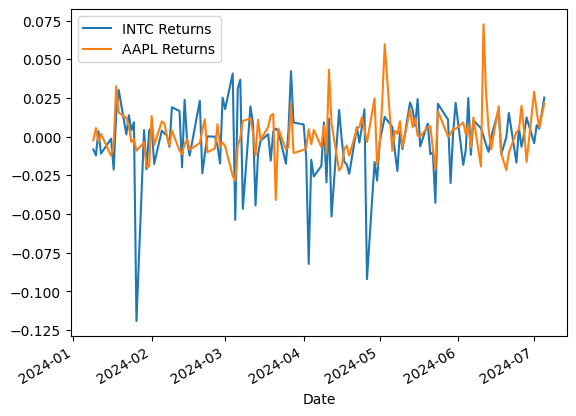

In [813]:
tech_stocks = ['MSFT', 'AAPL', 'CSCO', 'IBM', 'AMZN', 'INTC', 'VZ']
tech_stocks = ['INTC', 'AAPL']
financial_stocks = ['AXP', 'GS', 'JPM', 'TRV', 'V']
consumergoods_stocks = ['HD', 'KO', 'MCD', 'PG', 'WMT']
medical_stocks = ['AMGN', 'JNJ', 'MRK', 'UNH']
ax = None
for stock in tech_stocks:
    df = djia_returns[stock]
    
    df = df.reset_index()
    df = df[df['Date'] > today - np.timedelta64(180, 'D')]
    df.set_index('Date')
    df = df.rename(columns={"Return": f"{stock} Returns"})
    if ax is None:
        ax = df.plot(x='Date', y=f"{stock} Returns")
    else:
        df.plot(x='Date', y=f"{stock} Returns", ax=ax)

# NOT FINISHED YET

<h1>Constructing Momentum</h1>

In [814]:
timedelta_list = { #timedelta_list keys must ALL MATCH mom_list keys FOUND HERE
    '3M': pd.Timedelta(days=91), # closest multiple of 7, makes stuff EZ. 3M (3 month)
    '6M': pd.Timedelta(days=182), # closest multiple of 7, makes stuff EZ. 6M (6 month)
    '12M': pd.Timedelta(days=364), # closest multiple of 7, makes stuff EZ. 12M (12 months)
}

mom_list = { #timedelta_list keys must ALL MATCH mom_list keys FOUND HERE
    '3M': {},
    '6M': {},
    '12M': {} 
}
print("START")

for stock in temp_djia_data:
    if 'mom_list.pkl' in os.listdir():
        print('mom_list.pkl found, skipping momentum calculations.')
        break
    for timeframe in timedelta_list:
        stock_data = temp_djia_data[stock]
        timedelta = timedelta_list[timeframe]
        
        init_date = stock_data.iloc[0]['Date'] + timedelta
        #print(init_date)
        
        idx = stock_data[stock_data['Date'] == init_date].index
        if len(idx) == 0: # this fixes the case where the the init_date is on a non-tradeable day, shifting it two days forward usually fixes this
            init_date = stock_data.iloc[2]['Date'] + timedelta
        idx = stock_data[stock_data['Date'] == init_date].index
        
        mom_listed_data = []
        while idx < len(stock_data):
            curr_row = stock_data.iloc[idx[0]]
            lag_date = curr_row['Date'] - timedelta
            #print(lag_date)
            lag_data = stock_data[stock_data['Date'] == lag_date]
            
            if len(lag_data) == 0:
                idx += 1
                continue
            #print(f"{curr_row['Date']}\t{curr_row['Close']}\t{lag_data.iloc[0]['Close']}")
            momentum = ( (curr_row['Close'] / lag_data.iloc[0]['Close']) - 1)
            
            mom_listed_data.append((curr_row['Date'], momentum))
            idx += 1
        mom_list[timeframe][stock] = pd.DataFrame(mom_listed_data,columns=['Date', f'{timeframe}-Mom'])
        print(f'Finished {stock} {timeframe}')

mom_list['12_to_1'] = {}
mom_12_to_1 = {}
for stock in temp_djia_data: # want to do 
    if 'mom_list.pkl' in os.listdir():
        print('mom_list.pkl found, skipping momentum calculations.')
        break
    mom_list['12_to_1'][stock] = []
    #if 'mom_list.pkl' in os.listdir():
        #break

    stock_data = temp_djia_data[stock]
    idx = -1

    timeDelta = pd.Timedelta(days=28)
    oneDayDelta = pd.Timedelta(days=1)
    dayDeltaLimit = 4
    
    while -idx < len(stock_data):
        curr_date = stock_data.iloc[idx]['Date']
        init_calc_date = curr_date - timeDelta

        dayDeltaPos = 0
        while len(stock_data[stock_data['Date'] == init_calc_date]) == 0:
            init_calc_date -= oneDayDelta
            if dayDeltaPos > dayDeltaLimit:
                break
            dayDeltaPos += 1

        lag_date = init_calc_date - pd.Timedelta(days=364) # closest timedate multiple of 7 for 12 months
        dayDeltaPos = 0
        while len(stock_data[stock_data['Date'] == lag_date]) == 0:
            lag_date -= oneDayDelta
            if dayDeltaPos > dayDeltaLimit:
                break
            dayDeltaPos += 1
        
        init_calc_row = stock_data[stock_data['Date'] == init_calc_date]
        lag_row = stock_data[stock_data['Date'] == lag_date]

        if len(lag_row) == 0:
            break
        
        momentum = ( (init_calc_row.iloc[0]['Close'] / lag_row.iloc[0]['Close']) - 1)
        mom_list['12_to_1'][stock].append((curr_date, momentum))
        idx -= 1
    print(f'{stock} 12-to-1-MOM FINISHED')
    mom_list['12_to_1'][stock] = pd.DataFrame(mom_list['12_to_1'][stock], columns=['Date', '12to1-Mom'])


#

if 'mom_list.pkl' not in os.listdir():
    pickle.dump(mom_list, open('mom_list.pkl', 'wb')) # lets pickle this, because this takes too long to do EVERY time I load jupyter :)
print("DONE")

    


START
mom_list.pkl found, skipping momentum calculations.
mom_list.pkl found, skipping momentum calculations.
DONE


In [815]:
#mom_3M_list['AAPL']['Mom-3M']

#print(idx)

assert 'mom_list.pkl' in os.listdir()
mom_list = pickle.load(open('mom_list.pkl', 'rb'))
for timeframe in mom_list:
    for stock in mom_list[timeframe]:
        print(f'{timeframe} {stock} {len(mom_list[timeframe][stock])}')


3M MSFT 9260
3M AAPL 10544
3M AMZN 6522
3M JPM 10726
3M WMT 12568
3M V 3895
3M UNH 9601
3M PG 15121
3M JNJ 15121
3M HD 10354
3M MRK 15121
3M CVX 15121
3M KO 15121
3M CRM 4803
3M CSCO 8295
3M MCD 14026
3M DIS 15121
3M VZ 9821
3M AXP 12625
3M AMGN 9928
3M CAT 15121
3M IBM 15121
3M GS 6044
3M HON 15121
3M INTC 10726
3M BA 15121
3M MMM 15121
3M TRV 11782
3M DOW 1224
6M MSFT 9206
6M AAPL 10493
6M AMZN 6464
6M JPM 10674
6M WMT 12520
6M V 3837
6M UNH 9548
6M PG 15063
6M JNJ 15063
6M HD 10303
6M MRK 15063
6M CVX 15063
6M KO 15063
6M CRM 4745
6M CSCO 8240
6M MCD 13967
6M DIS 15063
6M VZ 9769
6M AXP 12575
6M AMGN 9875
6M CAT 15063
6M IBM 15063
6M GS 5986
6M HON 15063
6M INTC 10674
6M BA 15063
6M MMM 15063
6M TRV 11732
6M DOW 1165
12M MSFT 9239
12M AAPL 10542
12M AMZN 6460
12M JPM 10728
12M WMT 12600
12M V 3784
12M UNH 9585
12M PG 15170
12M JNJ 15170
12M HD 10352
12M MRK 15170
12M CVX 15170
12M KO 15170
12M CRM 4711
12M CSCO 8260
12M MCD 14062
12M DIS 15170
12M VZ 9809
12M AXP 12659
12M AMGN 9917

(-1.0, 1.0)

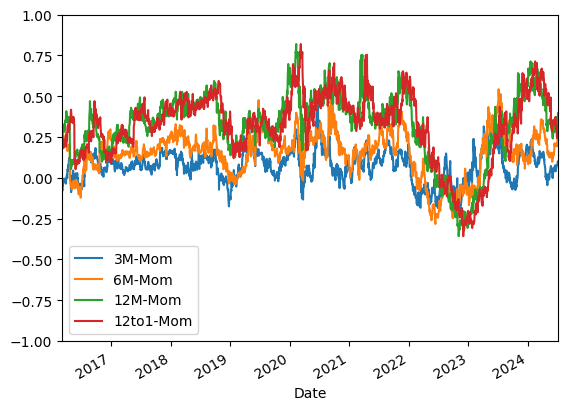

In [816]:
ax = None
limit = 5
i = 0
for timeframe in mom_list:
    if i > limit:
        break
    i+=1
    df = mom_list[timeframe]['MSFT']
    tf_tag = df.columns[1]
    if ax is None:
        ax = df.plot(x='Date', y=tf_tag)
    else:
        df.plot(x='Date', y=tf_tag, ax=ax)


ax.set_xlim(temp_djia_data['MSFT'].iloc[0]['Date'] + pd.Timedelta(days=365*30), temp_djia_data['MSFT'].iloc[-1]['Date'])
ax.set_ylim(-1,1)

<h1>We will assign equal weightings to each of stock in the top 3rd of Momentum Signals</h1>
<h2>From June 1963 to November 2012, there are roughly 21 trading days per month</h2>

In [864]:
from datetime import datetime, timedelta

stock_data = pickle.load(open('stock_ohlcv.pkl', 'rb'))
def calculate_monthly_rebalancing_returns(mom_streams):
    mom_streams
    '''
    df = pd.DataFrame(columns=['Date', 'Returns'])
    # lets start backtest from June 1963 
    
    init_date = '1963-06-03'
    for stock in temp_mom_streams:
        temp_df = temp_mom_streams[stock]
        temp_df = temp_df[temp_df['Date'] >= init_date].reset_index(drop=True)
        temp_mom_streams[stock] = temp_df
    '''
    
    #return_streams_df = {stock: None for stock in temp_mom_streams}
    trading_strat_date = []
    trading_strat_returns = []

    end_date = datetime.strptime('2012-11-30', '%Y-%m-%d')
    
    current_date = datetime.strptime('1963-06-03', '%Y-%m-%d')
    
    trading_strat_date.append(current_date)
    trading_strat_returns.append(1.00)

    mom_tag = mom_streams['AAPL'].columns[1]

    last_top_3rd = []
    last_top_3rd_prices = {}
    last_top_3rd_date = None

    while end_date > current_date:


        current_stocks_mom = {}
        no_info_count = 0

        for stock in mom_streams:
            temp_df = mom_streams[stock]
            if len(temp_df[temp_df['Date'] == current_date]) == 0:
                no_info_count += 1
            else:
                current_stocks_mom[stock] = temp_df[temp_df['Date'] == current_date].iloc[0][mom_tag]
                
        #print(no_info_count)
        if no_info_count >= 24:
            current_date += timedelta(days=1)
            continue



        
        if last_top_3rd_prices:
            curr_prices = {stock: None for stock in last_top_3rd_prices}
            for stock in curr_prices:
                tdf = stock_data[stock].reset_index()
                curr_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])

                #print(f'last {stock} price: {last_top_3rd_prices[stock]}')
                #print(f'curr {stock} price: {curr_prices[stock]}')
                
                
            return_stocks = {stock: None for stock in last_top_3rd_prices}
            for stock in return_stocks:
                return_stocks[stock] = (curr_prices[stock] / last_top_3rd_prices[stock]) - 1

            trading_strat_date.append(current_date)

            total_returns = 0

            for stock in return_stocks:
                total_returns += ( 1/len(return_stocks) ) * return_stocks[stock]

            #trading_strat_returns.append( (total_returns + 1) * (trading_strat_returns[-1]) )
            trading_strat_returns.append( (total_returns + 1) )

            #print(f'return_stocks: {return_stocks}')
            #print(total_returns)
            
            

            last_top_3rd = []
            last_top_3rd_prices = {}
            last_top_3rd_date = None

        top_3rd_stocks = []
        temp_sorted_dict = dict(sorted(current_stocks_mom.items(), key=lambda item: item[1]))
        stocks_to_pop = []
        for stock in temp_sorted_dict:
            if temp_sorted_dict[stock] < 0:
                stocks_to_pop.append(stock)

        for stock in stocks_to_pop:
            temp_sorted_dict.pop(stock)

        ascending_mom_stocks = list(temp_sorted_dict.keys())
        #print(ascending_mom_stocks)
        count_of_stocks = len(ascending_mom_stocks)

        for _ in range(count_of_stocks - count_of_stocks // 3):
            ascending_mom_stocks.pop(0)
            
        last_top_3rd = ascending_mom_stocks
        last_top_3rd_date = current_date
        for stock in last_top_3rd:
            tdf = stock_data[stock].reset_index()
            last_top_3rd_prices[stock] = float(tdf[tdf['Date'] == f'{current_date: %Y-%m-%d}']['Close'].iloc[0])
            
        #print(last_top_3rd)
        #print(last_top_3rd_date)
        #print(last_top_3rd_prices)
        
        current_date += timedelta(days=31)

    tdf = pd.DataFrame({'Date': trading_strat_date, 'Returns': trading_strat_returns})
    return tdf

In [867]:

trading_strat_returns = {mom_strat: calculate_monthly_rebalancing_returns(mom_list[mom_strat]) for mom_strat in mom_list}

    
#a = calculate_monthly_rebalancing_returns(mom_list['3M'])

#print(a['AAPL'])

<h1>Let's take a look at the index when $1,000 is invested starting in 1963</h1>

3M Returns: 21068.150458471035
6M Returns: 34018.23347252393
12M Returns: 209898.13199664414
12_to_1 Returns: 219137.1781114546


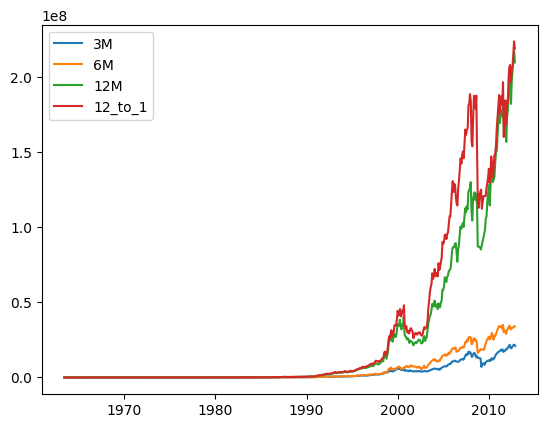

In [902]:

for strat in trading_strat_returns:
    strat_return_stream = trading_strat_returns[strat]
    print(f'{strat} Returns: {strat_return_stream["Returns"].cumprod().iloc[-1]}')
    strat_return_stream['1e3cp'] = strat_return_stream['Returns'].cumprod() * 1000
    plt.plot(strat_return_stream['Date'], strat_return_stream['1e3cp'], label=strat)
    plt.legend()
    #ax, fig = strat_return_stream.plot(x='Date', y='1e3cp')
    #strat_return_stream.info()

<h3>Calculating annualized <i>geometric</i> mean return</h3>
<h4>Take to the 1/yearcount power</h4>

In [914]:
# from 06-1963 to 11-2012 is 59 years, 5 months which is 59.416667 years
for strat in trading_strat_returns:
    cumprod = 1
    for month in trading_strat_returns[strat].iloc:
        cumprod *= month['Returns']
    cumprod = cumprod ** (1/59.41667)
    print(f'Annualized Rate of Return for {strat}: {cumprod-1}')

Annualized Rate of Return for 3M: 0.18240947679904984
Annualized Rate of Return for 6M: 0.19198293896452467
Annualized Rate of Return for 12M: 0.22905400620314165
Annualized Rate of Return for 12_to_1: 0.2299453624941885


<h1>Calculating annualized volatility</h1>
<h3>$$volatility_{annualized} = {variance}^{2} \sqrt{12} = \sqrt{12}\sigma$$</h3>

In [919]:
for strat in trading_strat_returns:
    stddev = trading_strat_returns[strat]['Returns'].std()
    print(f'Annualized Volatility for {strat}: {stddev * (12 ** 0.5)}')

Annualized Volatility for 3M: 0.2537452444648006
Annualized Volatility for 6M: 0.260275148601835
Annualized Volatility for 12M: 0.26236409284760237
Annualized Volatility for 12_to_1: 0.27126978678768354


<h1>Calculating Sharpe Ratio</h1>
$$S_a = \frac{\mu_{return}}{\sigma}$$

In [935]:
for strat in trading_strat_returns:
    sharpe = (trading_strat_returns[strat]['Returns'].cumprod().iloc[-1] ** (1/59.41667) - 1) / (trading_strat_returns[strat]['Returns'].std())
    print(f'Sharpe Ratio for {strat}: {sharpe}')

Sharpe Ratio for 3M: 2.490233716611292
Sharpe Ratio for 6M: 2.55517444718967
Sharpe Ratio for 12M: 3.0242947662162427
Sharpe Ratio for 12_to_1: 2.93639078292563


<h1>Calculating hit rate</h1>
$$h = \frac{profitable\ months}{total\ months}$$

In [949]:
for strat in trading_strat_returns:
    hits = 0
    for month in trading_strat_returns[strat].iloc:
        if month['Returns'] > 1:
            hits += 1
    hit_rate = (hits - 1) / ( len(trading_strat_returns[strat]) - 1)
        
    print(f'Hit rate for {strat}: {hit_rate}')

Hit rate for 3M: 0.6077348066298343
Hit rate for 6M: 0.6403669724770642
Hit rate for 12M: 0.631768953068592
Hit rate for 12_to_1: 0.6407942238267148


<h1>Calculating max drawdown</h1>

In [1046]:
for strat in trading_strat_returns:
    
    #max_drawdown = 0
    tdf = trading_strat_returns[strat]
    tdf_length = len(tdf)
    tdf['Reversed Returns'] = tdf['Returns'].values[::-1]
    #print(f'max numerator: {tdf["Returns"].cumprod()}')
    #print(f'max denominator (excl. -1): {tdf["Returns"].cumprod().cummax() }')
    max_drawdown = (tdf['Returns'].cumprod() / tdf['Returns'].cumprod().cummax() - 1)
    print(f'Max drawdown for {strat}: {max_drawdown.min()}')
    idxmin = max_drawdown.idxmin()
    #print(tdf.iloc[idxmin])
    #plt.plot(tdf['Date'], tdf['Returns'].cumprod())
    #plt.axvline(tdf.iloc[idxmin]['Date'])
    #plt.xlim([datetime.strptime('1990-01-01', '%Y-%m-%d'), datetime.strptime('2012-01-01', '%Y-%m-%d')])
    

Max drawdown for 3M: -0.590643218300285
Max drawdown for 6M: -0.41389202122993685
Max drawdown for 12M: -0.474802067023425
Max drawdown for 12_to_1: -0.45716296961624825


<h2>Highest monthly gain per annum</h2
<h4>These calculations will start from the Jan-1964 until Jan-2012</h4>

In [1065]:
#datetime.strptime('2012-11-30', '%Y-%m-%d')
highest_gains_annualized = {strat: None for strat in trading_strat_returns}
for strat in trading_strat_returns:
    year = []
    highest_gain = []

    curr_year = 1964

    while curr_year <= 2012:
        year += [curr_year]
        tdf = trading_strat_returns[strat]
        tdf = tdf[tdf['Date'] >= datetime.strptime(f'{curr_year}-01-01', '%Y-%m-%d')]
        tdf = tdf[tdf['Date'] <= datetime.strptime(f'{curr_year}-12-31', '%Y-%m-%d')]
        highest_gain += [tdf['Returns'].max()]
        curr_year += 1
    highest_gains_annualized[strat] = pd.DataFrame({'year': year, 'Highest Monthly Gain': highest_gain})

In [1066]:
print(highest_gains_annualized)

{'3M':     year  Highest Monthly Gain
0   1964              1.098988
1   1965              1.101377
2   1966              1.062501
3   1967              1.108149
4   1968              1.168057
5   1969              1.081230
6   1970              1.112406
7   1971              1.189073
8   1972              1.101812
9   1973              1.106987
10  1974              1.072115
11  1975              1.171722
12  1976              1.063996
13  1977              1.142440
14  1978              1.186625
15  1979              1.130442
16  1980              1.142298
17  1981              1.106737
18  1982              1.500005
19  1983              1.176782
20  1984              1.123996
21  1985              1.214570
22  1986              1.210226
23  1987              1.195005
24  1988              1.110811
25  1989              1.135047
26  1990              1.122689
27  1991              1.237487
28  1992              1.063676
29  1993              1.105508
30  1994              1.166892
3

<h2>Highest monthly loss per annum</h2
<h4>These calculations will start from the Jan-1964 until Jan-2012</h4>

In [1070]:
#datetime.strptime('2012-11-30', '%Y-%m-%d')
highest_losses_annualized = {strat: None for strat in trading_strat_returns}
for strat in trading_strat_returns:
    year = []
    highest_loss = []

    curr_year = 1964

    while curr_year <= 2012:
        year += [curr_year]
        tdf = trading_strat_returns[strat]
        tdf = tdf[tdf['Date'] >= datetime.strptime(f'{curr_year}-01-01', '%Y-%m-%d')]
        tdf = tdf[tdf['Date'] <= datetime.strptime(f'{curr_year}-12-31', '%Y-%m-%d')]
        highest_loss += [tdf['Returns'].min()]
        curr_year += 1
    highest_losses_annualized[strat] = pd.DataFrame({'year': year, 'Highest Monthly Gain': highest_loss})

In [1071]:
print(highest_losses_annualized)

{'3M':     year  Highest Monthly Gain
0   1964              0.971318
1   1965              0.939726
2   1966              0.811585
3   1967              0.925215
4   1968              0.908845
5   1969              0.906003
6   1970              0.868687
7   1971              0.974518
8   1972              0.981805
9   1973              0.923910
10  1974              0.846160
11  1975              0.888173
12  1976              0.944197
13  1977              0.939716
14  1978              0.942398
15  1979              0.925605
16  1980              0.797124
17  1981              0.895834
18  1982              0.939511
19  1983              0.925843
20  1984              0.931740
21  1985              0.936862
22  1986              0.916304
23  1987              0.717351
24  1988              0.930629
25  1989              0.948027
26  1990              0.896908
27  1991              0.975317
28  1992              0.936782
29  1993              0.977339
30  1994              0.909584
3